In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("spam.csv", encoding='latin-1', usecols = [0,1])
df.columns=['label', 'message']
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_num'] = le.fit_transform(df['label'])
print(df.head())

  label                                            message  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0


In [5]:
from sklearn.model_selection import train_test_split

x= df['message']
y= df['label_num']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f'training set size: {len(x_train)}')
print(f'test set size: {len(x_test)}')


training set size: 4457
test set size: 1115


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x_train_vect = vectorizer.fit_transform(x_train)
x_test_vect = vectorizer.transform(x_test)


In [7]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_vect, y_train)

from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test_vect)

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('accuracy:', accuracy_score(y_test, y_pred))
print('clas report:', classification_report(y_test, y_pred))
print('confusion matrix:', confusion_matrix(y_test, y_pred))


accuracy: 0.9623318385650225
clas report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

confusion matrix: [[965   0]
 [ 42 108]]


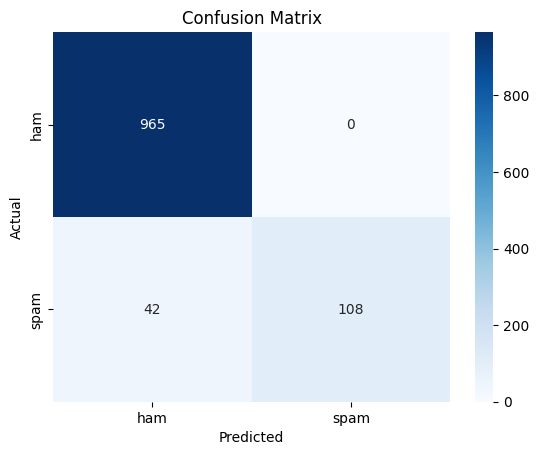

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham','spam'], yticklabels=['ham','spam'] )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [11]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.to_csv('report.csv')
df_report[['precision', 'recall', 'f1-score']].iloc[:2]


,precision,recall,f1-score
0,0.958292,1.00,0.978702
1,1.000000,0.72,0.837209


In [13]:
def predict_sms(msg):
    vector = vectorizer.transform([msg])
    prediction = model.predict(vector)
    return "spam" if prediction == 1 else "ham"

In [18]:
predict_sms("URGENT! You have won a 1 week FREE membership in our �100,000 Prize Jackpot!")

'spam'

In [17]:
predict_sms("Hey, I'm going to the movies tomorrow")

'ham'